# Практическая работа № 1

Валерий Сергеевич Верхотуров
БСБО-05-20

In [9]:
from IPython.core.display_functions import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Задание 1

Создать функцию, реализующую мультипликативный метод генерации последовательности случайных чисел со следующими параметрами: $a = 22695477,\,b = 1,\,m = 2^{32}$.

In [10]:
# multiplicative method for generating random numbers
def multiplicative_method(a = 22_695_477, b = 1, m = 2 ** 64 - 1, x = 0):
    while True:
        if m > 2 ** 32:
            m = m % 2 ** 32
        else:
            break
    assert 0 <= a < m
    assert 0 <= b < m
    assert m >= 2
    assert 0 <= x < m
    while True:
        x = (a * x + b) % m
        yield x / m

## Задание 2

Сгенерировать с помощью функции, реализующей мультипликативный метод, равномерно распределенные последовательности случайных чисел в интервале от $A = 0$ до $B = 10$ длинной $N = 10^2, 10^3, 10^4, 10^5$. В качестве начального значения для генератора использовать $X_0 = 1$.

In [11]:
def task_2():
    N = [10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5]
    A = 0
    B = 10
    X_0 = 1

    df = pd.DataFrame(index=range(max(N)))
    multiplicative_generator = multiplicative_method(x = X_0)
    for n in N:
        df[n] = pd.Series(
            map(
                lambda x: (B - A) * x + A,
                [next(multiplicative_generator) for _ in range(n)]),
            name=n)
    display(df.head())
    df.to_csv("task 2.csv", mode="w+")
task_2()

,100,1000,10000,100000
0,0.052842,2.286569,0.513570,3.747002
1,5.020214,3.698231,7.582951,1.821769
2,3.887881,8.546186,8.073215,3.286902
3,0.422562,1.105707,3.060830,8.825199
4,7.115508,3.069225,7.774856,8.193695


## Задание 3

Рассчитать для сгенерированных последовательностей математическое ожидание и дисперсию. Сравнить полученные значения с математическим ожиданием и дисперсией теоретической равномерно распределенной случайной величины.

In [12]:
def task_3():
    df = pd.read_csv("task 2.csv")
    for column in df.columns[1:]:
        print(f"Expected value for n = {df[column].name}: {df[column].mean()}")
        print(f"Dispersion for n = {df[column].name}: {df[column].std()}\n")

task_3()

Expected value for n = 100: 4.959844905757309
Dispersion for n = 100: 2.8204367270096316

Expected value for n = 1000: 4.980581583229495
Dispersion for n = 1000: 2.910508327509599

Expected value for n = 10000: 4.9729328728916435
Dispersion for n = 10000: 2.883707178435099

Expected value for n = 100000: 4.99987930629388
Dispersion for n = 100000: 2.8848267159950556



Математическое ожидание теоретической равномерно распределенной величины:
$$M[X]=\frac{a + b}{2} = \frac{0 + 10}{2} = 5$$

Дисперсия теоретической равномерно распределенной величины:
$$D[X]=\frac{b - a}{12} = \frac{10 - 0}{12} = \frac{5}{6}$$

## Задание 4

Определить период сгенерированной последовательности случайных чисел.

In [13]:
def task_4():
    multiplicative_generator = multiplicative_method(x = 1)
    numbers = [next(multiplicative_generator) for _ in range(10 ** 4)]
    for index_1, number_1 in enumerate(numbers):
        for index_2, number_2 in enumerate(numbers[index_1 + 1:]):
            if number_1 == number_2:
                print(f"The period is {index_2 - index_1}")
                return index_2 - index_1
    return -1

print("Result:", task_4())

Result: -1


Период для первых $10^4$ чисел не найден.

## Задание 5

Реализовать функцию определения относительных частот случайных чисел о известной выборке. Входными параметрами должны быть: выборка случайных чисел, заданные левая и правая граница выборки, количество участков. Выходным параметром — относительные частоты для заданных участков.

In [14]:
# frequency of random numbers of a known sample
def task_5(series_of_random_numbers, left_border, right_border, number_of_sections):
    series_of_random_numbers = series_of_random_numbers.dropna()

    step = (right_border - left_border) / number_of_sections
    rng = np.arange(left_border, right_border + 1, step)
    plt.hist(series_of_random_numbers,
             bins = rng,
             weights = np.ones_like(series_of_random_numbers) /
                       len(series_of_random_numbers))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f"Bar chart for {series_of_random_numbers.name} pseudorandom numbers")
    plt.grid(True)
    plt.show()

    series_of_random_numbers_length = len(series_of_random_numbers)
    relative_frequencies = series_of_random_numbers\
        .apply(lambda numb: np.floor(numb))\
        .value_counts()\
        .apply(lambda numb: numb / (series_of_random_numbers_length * step))\
        .sort_index()
    print("Relative frequencies for the bar chart above:")
    display(relative_frequencies)

    theoretical_frequency = 1 / number_of_sections
    print("Pearson's criterion for the bar chart above:",
          sum((theoretical_frequency - freq) ** 2 / freq
              for freq in relative_frequencies))

## Задание 6

Построить гистограммы относительных частот для получения последовательностей случайных чисел на 10 участках, рассчитать для них значение критерия Пирсона.

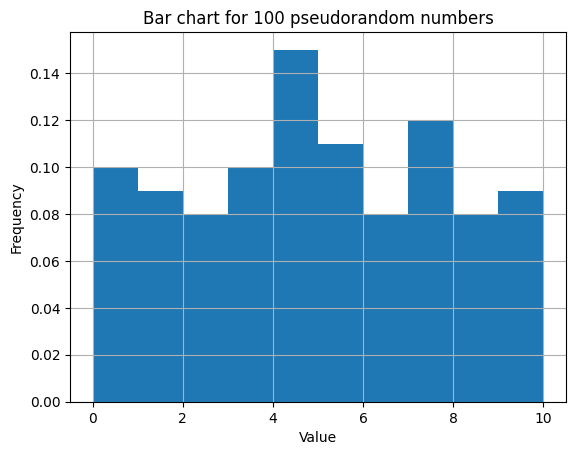

Relative frequencies for the bar chart above:


0.0    0.10
1.0    0.09
2.0    0.08
3.0    0.10
4.0    0.15
5.0    0.11
6.0    0.08
7.0    0.12
8.0    0.08
9.0    0.09
Name: 100, dtype: float64

Pearson's criterion for the bar chart above: 0.03813131313131313


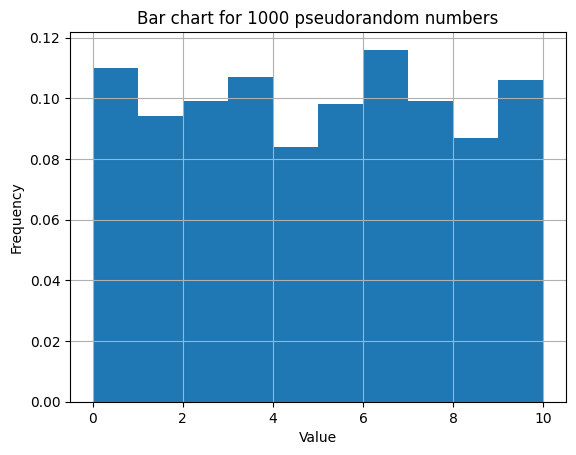

Relative frequencies for the bar chart above:


0.0    0.110
1.0    0.094
2.0    0.099
3.0    0.107
4.0    0.084
5.0    0.098
6.0    0.116
7.0    0.099
8.0    0.087
9.0    0.106
Name: 1000, dtype: float64

Pearson's criterion for the bar chart above: 0.009347698880946246


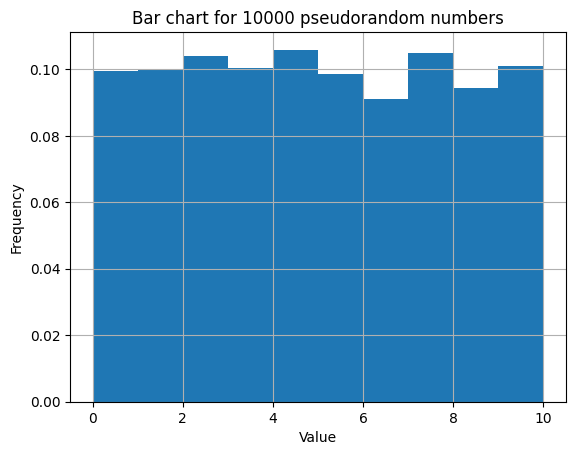

Relative frequencies for the bar chart above:


0.0    0.0995
1.0    0.1001
2.0    0.1040
3.0    0.1005
4.0    0.1059
5.0    0.0985
6.0    0.0911
7.0    0.1049
8.0    0.0944
9.0    0.1011
Name: 10000, dtype: float64

Pearson's criterion for the bar chart above: 0.0019530356187414258


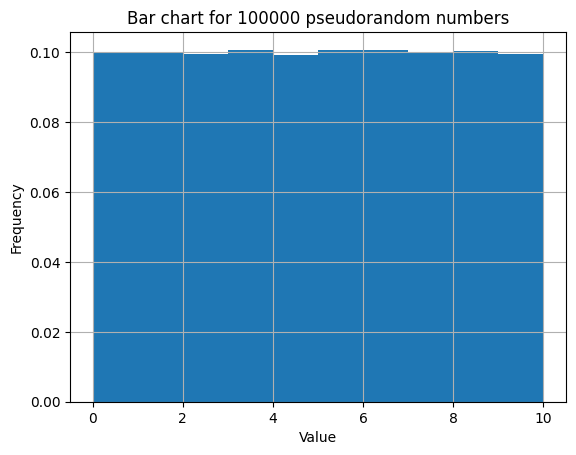

Relative frequencies for the bar chart above:


0.0    0.10008
1.0    0.09996
2.0    0.09937
3.0    0.10072
4.0    0.09924
5.0    0.10058
6.0    0.10057
7.0    0.09973
8.0    0.10024
9.0    0.09951
Name: 100000, dtype: float64

Pearson's criterion for the bar chart above: 2.5334898610610854e-05


In [15]:
def task_6():
    LEFT_BORDER = 0
    RIGHT_BORDER = 10
    NUMBER_OF_SECTIONS = 10

    df = pd.read_csv("task 2.csv")

    for series_name in df.columns[1:]:
        task_5(df[series_name], LEFT_BORDER, RIGHT_BORDER, NUMBER_OF_SECTIONS)

task_6()

## Задание 7

Сравнение с функцией [random.uniform](https://docs.python.org/3/library/random.html#random.uniform), функцией [numpy.random.random_sample](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html#numpy.random.random_sample) для генерации псевдослучайных чисел.

random.uniform


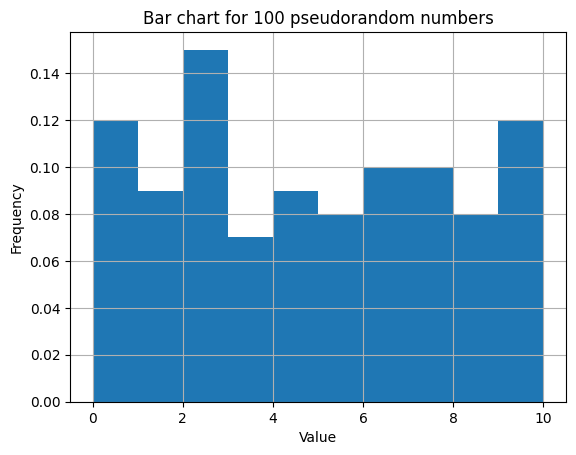

Relative frequencies for the bar chart above:


0.0    0.12
1.0    0.09
2.0    0.15
3.0    0.07
4.0    0.09
5.0    0.08
6.0    0.10
7.0    0.10
8.0    0.08
9.0    0.12
Name: 100, dtype: float64

Pearson's criterion for the bar chart above: 0.0484126984126984


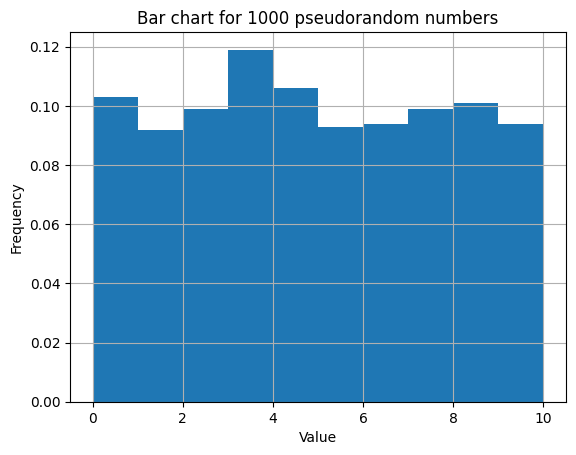

Relative frequencies for the bar chart above:


0.0    0.103
1.0    0.092
2.0    0.099
3.0    0.119
4.0    0.106
5.0    0.093
6.0    0.094
7.0    0.099
8.0    0.101
9.0    0.094
Name: 1000, dtype: float64

Pearson's criterion for the bar chart above: 0.005479209079116975


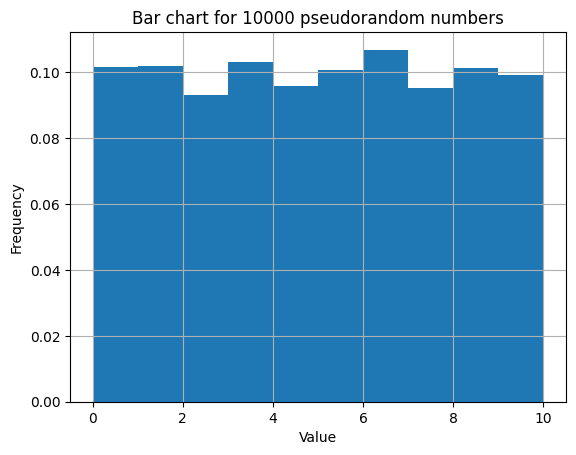

Relative frequencies for the bar chart above:


0.0    0.1017
1.0    0.1021
2.0    0.0932
3.0    0.1033
4.0    0.0960
5.0    0.1008
6.0    0.1069
7.0    0.0952
8.0    0.1015
9.0    0.0993
Name: 10000, dtype: float64

Pearson's criterion for the bar chart above: 0.0015606725166407902


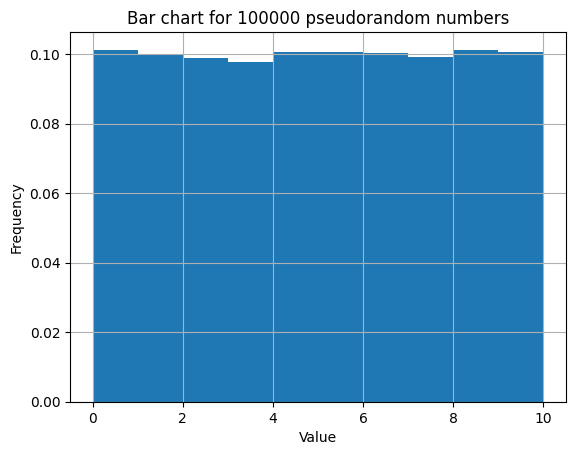

Relative frequencies for the bar chart above:


0.0    0.10112
1.0    0.10012
2.0    0.09876
3.0    0.09783
4.0    0.10045
5.0    0.10049
6.0    0.10019
7.0    0.09922
8.0    0.10123
9.0    0.10059
Name: 100000, dtype: float64

Pearson's criterion for the bar chart above: 0.00010555456524763181
numpy.random.random_sample


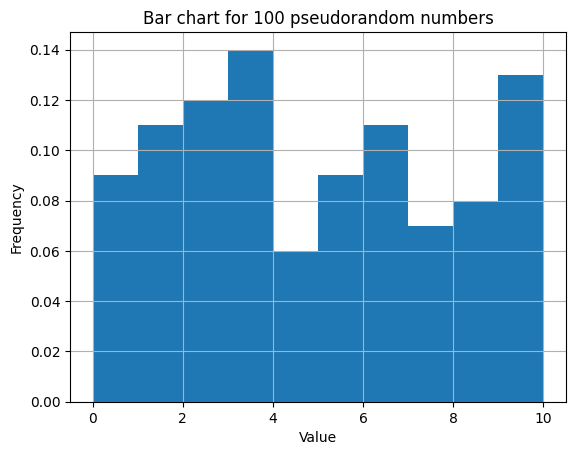

Relative frequencies for the bar chart above:


0.0    0.09
1.0    0.11
2.0    0.12
3.0    0.14
4.0    0.06
5.0    0.09
6.0    0.11
7.0    0.07
8.0    0.08
9.0    0.13
Name: 100, dtype: float64

Pearson's criterion for the bar chart above: 0.07024919524919526


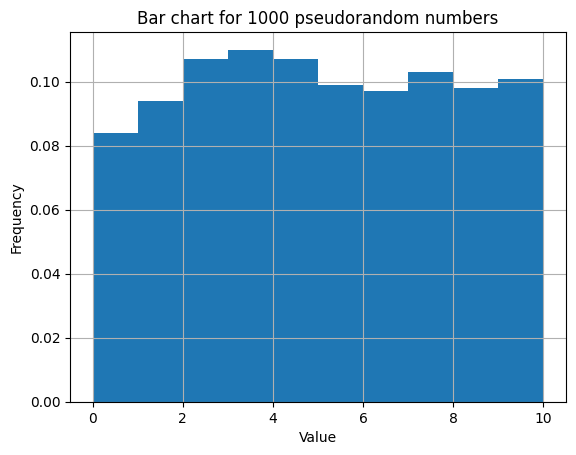

Relative frequencies for the bar chart above:


0.0    0.084
1.0    0.094
2.0    0.107
3.0    0.110
4.0    0.107
5.0    0.099
6.0    0.097
7.0    0.103
8.0    0.098
9.0    0.101
Name: 1000, dtype: float64

Pearson's criterion for the bar chart above: 0.005496557003243469


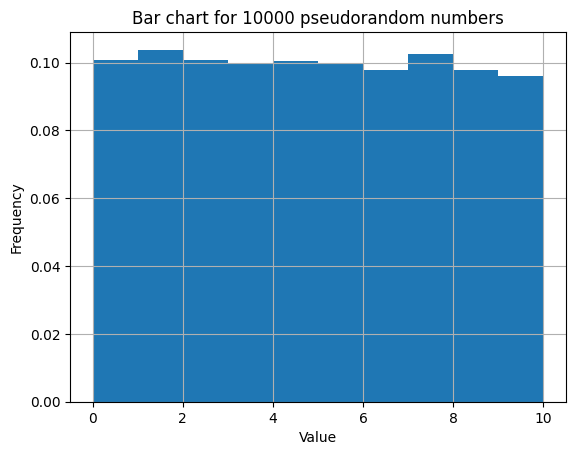

Relative frequencies for the bar chart above:


0.0    0.1009
1.0    0.1038
2.0    0.1008
3.0    0.1000
4.0    0.1004
5.0    0.0998
6.0    0.0979
7.0    0.1026
8.0    0.0977
9.0    0.0961
Name: 10000, dtype: float64

Pearson's criterion for the bar chart above: 0.00047883594425485236


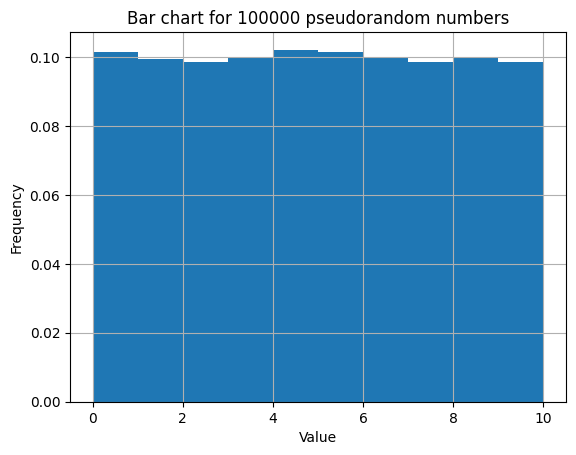

Relative frequencies for the bar chart above:


0.0    0.10154
1.0    0.09927
2.0    0.09851
3.0    0.10010
4.0    0.10210
5.0    0.10134
6.0    0.09993
7.0    0.09867
8.0    0.09998
9.0    0.09856
Name: 100000, dtype: float64

Pearson's criterion for the bar chart above: 0.0001512921492322031


In [16]:
def task_7():
    from random import uniform
    from numpy.random import random_sample
    LEFT_BORDER = 0
    RIGHT_BORDER = 10
    NUMBER_OF_SECTIONS = 10
    N = [10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5]

    print("random.uniform")
    for n in N:
        task_5(pd.Series([uniform(LEFT_BORDER, RIGHT_BORDER) for _ in range(n)], name=n),
               LEFT_BORDER,
               RIGHT_BORDER,
               NUMBER_OF_SECTIONS)

    print("numpy.random.random_sample")
    for n in N:
        task_5(pd.Series(
                [random_sample() * (RIGHT_BORDER - LEFT_BORDER) + LEFT_BORDER
                 for _ in range(n)],
                name=n),
            LEFT_BORDER,
            RIGHT_BORDER,
            NUMBER_OF_SECTIONS)

task_7()

## Вывод

Проведен анализ мультипликативного метода генерации случайных чисел. Функции генерации псевдослучайных чисел из стандартной библиотеки Python и NumPy похожи по выдаваемому результату.